In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-police-shootings/fatal-police-shootings-data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../input/data-police-shootings/fatal-police-shootings-data.csv')

In [4]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [6]:
df['date']=pd.to_datetime(df['date'])

In [7]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [8]:
df.shape

(5416, 14)

In [9]:
df.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(4399, 14)

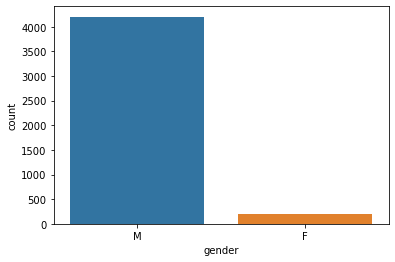

In [12]:
sns.countplot(df['gender'])

So men have been targeted more as compared to the women.

Let's check the age group

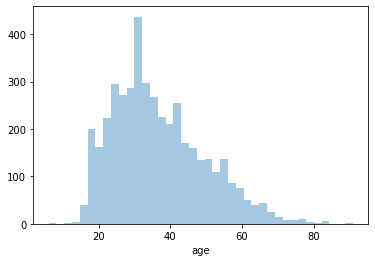

In [13]:
sns.distplot(df['age'],kde = False)

In [14]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [15]:
import wordcloud

In [16]:
from wordcloud import WordCloud

In [17]:
wordcloud1 = WordCloud().generate(' '.join(df['armed']))

Text(0.5, 1.0, 'Most Used Arms')

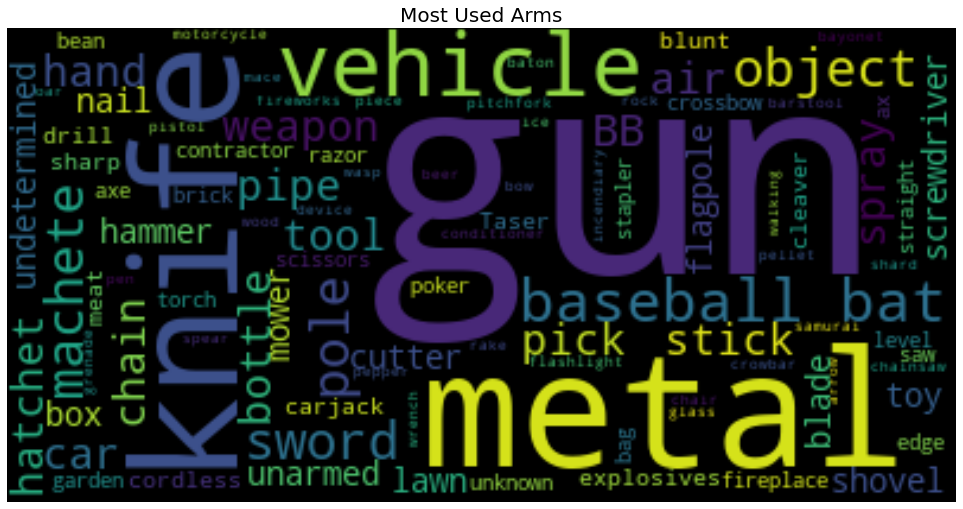

In [18]:
armed=list(df['armed'].dropna().unique())
fig, (ax2) = plt.subplots(1,1,figsize=[17, 10])
wordcloud2 = WordCloud().generate(" ".join(armed))
ax2.imshow(wordcloud2,interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Most Used Arms',fontsize=20)

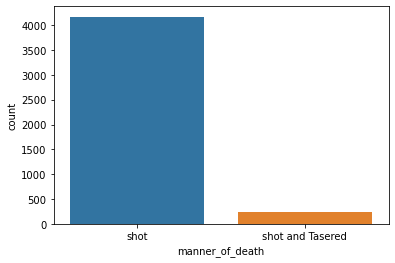

In [19]:
sns.countplot(df['manner_of_death'])

In [20]:
df['flee'].value_counts()

Not fleeing    2965
Car             657
Foot            630
Other           147
Name: flee, dtype: int64

In [21]:
df['flee'].count()

4399

In [22]:
print("We See {}% targets don't flee.".format(round(2965*100/4399),2))

We See 67% targets don't flee.


In [23]:
print(f'{len(df.loc[(df.flee=="Not fleeing") & (df.armed=="unarmed")])} cases were unarmed and did not flee. Yet thee targets were killed.')

185 cases were unarmed and did not flee. Yet thee targets were killed.


In [24]:
print(f'In {len(df.loc[(df.body_camera==False) & (df.armed=="unarmed")])} cases, the target was unarmed and the cop had NO body camera.')

In 281 cases, the target was unarmed and the cop had NO body camera.


In [25]:
print(f'In {len(df.loc[(df.race=="B") & (df.manner_of_death=="shot")])} cases, the target was black and was shot.')

In 1100 cases, the target was black and was shot.


In [26]:
df['manner_of_death'].value_counts()

shot                4169
shot and Tasered     230
Name: manner_of_death, dtype: int64

In [27]:
print("We See {}% targets were black and got shot.".format(round(1100*100/1469),2))

We See 75% targets were black and got shot.


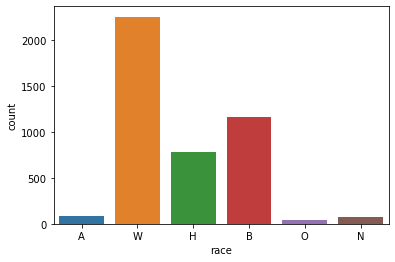

In [28]:
sns.countplot(df['race'])

* A- Asian
* W- White
* H- Hispanics
* B- Blacks
* O- Other (Unknown)
* N- Native American

In [29]:
import plotly.express as px
import plotly.graph_objects as go

In [30]:
fig = go.Figure(go.Bar(
    x= df.groupby('city').agg('count')['id'].sort_values(ascending=False)[:20].index, 
    y= df.groupby('city').agg('count')['id'].sort_values(ascending=False)[:20].values,  
    text=df.groupby('city').agg('count')['id'].sort_values(ascending=False)[:20].index,
    textposition='outside',
    marker_color=df.groupby('city').agg('count')['id'].sort_values(ascending=False)[:20].values
))
fig.update_layout(title='Shootout by City Stats')
fig.show()

# Los Angeles ??